In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [75]:
# data = pd.read_csv("C:/Users/drago/university/23.1 semester/DL/DLmodels-tensorflow/data/iris.csv", index_col=[0,1,2,3,4])
# data
import csv

data = []
with open('C:/Users/drago/university/23.1 semester/DL/DLmodels-tensorflow/data/iris.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if len(row) != 0:
            if row [4] == "Iris-setosa":
                row [4] = 0
            if row [4] == "Iris-versicolor":
                row [4] = 1    
            if row [4] == "Iris-virginica":
                row [4] = 2
            int_list = list(map(float, row[0:4]))
            data.append((int_list, np.array(row[4])))    
               

In [76]:
import random

random.shuffle(data)

In [77]:
target = [row[1] for row in data]
data = [row[0] for row in data]

In [78]:
data[0][3]
#5.1, 3.8, 1.6, 0.2

1.8

In [79]:
# normalize
mmin = [12,12,12,12]
mmax = [0,0,0,0]
for i in range(4):
    for j in range(len(data)):
        if mmin[i] > data[j][i]:
            mmin[i] = data[j][i]
        if mmax[i] < data[j][i]:
            mmax[i] = data[j][i]
print(mmin)
print(mmax)

[4.3, 2.0, 1.0, 0.1]
[7.9, 4.4, 6.9, 2.5]


In [80]:
for i in range(4):
    for j in range(len(data)):
        data[j][i] = (data[j][i] - mmin[i]) / (mmax[i] - mmin[i])
        #( X- (X의 최솟값) ) / ( X의 최댓값 - X의 최솟값 )

In [81]:
x_train, x_test, y_train, y_test = train_test_split(
            data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)

In [82]:
x_train = np.array(x_train)
x_test = np.array(x_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [83]:
print("\n\nData Read Done!")
print("Training X Size : " + str(x_train.shape))
print("Training Y Size : " + str(y_train.shape))
print("Test X Size : " + str(x_test.shape))
print("Test Y Size : " + str(y_test.shape) + '\n\n')




Data Read Done!
Training X Size : (120, 4)
Training Y Size : (120,)
Test X Size : (30, 4)
Test Y Size : (30,)




In [84]:
import sys
from tensorflow import keras
from  tensorflow.keras.optimizers import Adam 

In [85]:
model = keras.Sequential([
    keras.layers.Dense(4),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'],
                  loss='sparse_categorical_crossentropy')  

In [86]:
print("*****************start training*************************\n\n", model.summary)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=50, batch_size=5,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# res = model.evaluate(x_test,y_test,verbose = 0 )
# print("acc is : ", res[1]* 100)

*****************start training*************************

 <bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002B0AA643198>>
Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0889 - accuracy: 0.3500 - val_loss: 1.0744 - val_accuracy: 0.5000
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0467 - accuracy: 0.5500 - val_loss: 1.0216 - val_accuracy: 0.5333
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9995 - accuracy: 0.5750 - val_loss: 0.9760 - val_accuracy: 0.6000
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9543 - accuracy: 0.6167 - val_loss: 0.9306 - val_accuracy: 0.6333
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9043 - accuracy: 0.6583 - val_loss: 0.8814 - val_accuracy: 0.6333
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.8514 - accuracy: 0.6667 - val_loss: 0.8256 - val_accuracy: 0.6333
Epo

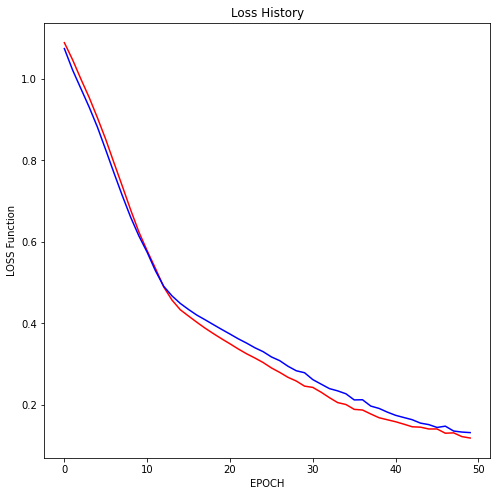

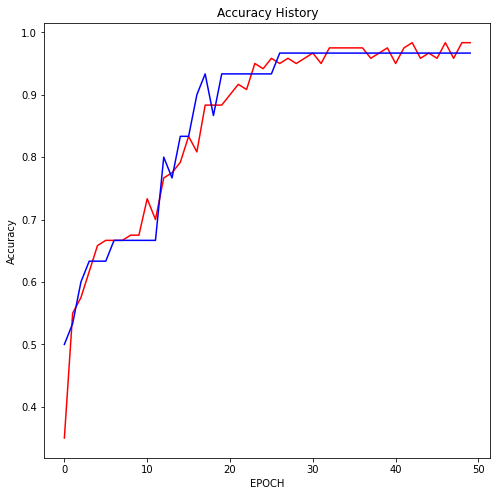

In [87]:
from matplotlib import pyplot as plt
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [ ]:
코드 pdf 결과이미지